## Practical Example: Data Analysis Conversation

Here's a complete example showing how different message types can be used in a data analysis scenario:

In [9]:
from autogen_ext.models.openai import OpenAIChatCompletionClient
from autogen_agentchat.agents import AssistantAgent
from autogen_core import CancellationToken
from autogen_agentchat.teams import RoundRobinGroupChat
from autogen_agentchat.conditions import MaxMessageTermination
from autogen_agentchat.messages import TextMessage, MultiModalMessage
from autogen_core import Image as AGImage
from PIL import Image
from io import BytesIO
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO

In [19]:
# Create sample data
def generate_sample_data():
    data = {
        'date': pd.date_range(start='2023-01-01', periods=12, freq='M'),
        'sales': [100, 120, 140, 160, 180, 200, 190, 180, 170, 160, 150, 140]
    }
    return pd.DataFrame(data)

# Create visualization
def create_sales_plot(df):
    plt.figure(figsize=(10, 6))
    plt.plot(df['date'], df['sales'], marker='o')
    plt.title('Monthly Sales Trend')
    plt.grid(True)
    
    buf = BytesIO()
    plt.savefig(buf, format='png')
    plt.close()
    
    return Image.open(buf)

# Create messages for analysis workflow
df = generate_sample_data()
plot_img = AGImage(create_sales_plot(df))

# Initial request
request_message = TextMessage(
    content="Let's analyze our monthly sales data for 2023",
    source="user"
)

# Data summary
data_message = TextMessage(
    content=f"Summary Statistics:\n{df.describe().to_string()}",
    source="user"
)

# Visualization with analysis
visualization_message = MultiModalMessage(
    content=[
        "Here's our sales trend visualization.",
        plot_img
    ],
    source="user"
)

# Print messages to verify
print("Request:", request_message.content)
print("\nData Summary:", data_message.content)
print("\nVisualization Message:", visualization_message.content[0])

Request: Let's analyze our monthly sales data for 2023

Data Summary: Summary Statistics:
                      date       sales
count                   12   12.000000
mean   2023-07-15 22:00:00  157.500000
min    2023-01-31 00:00:00  100.000000
25%    2023-04-22 12:00:00  140.000000
50%    2023-07-15 12:00:00  160.000000
75%    2023-10-07 18:00:00  180.000000
max    2023-12-31 00:00:00  200.000000
std                    NaN   29.271457

Visualization Message: Here's our sales trend visualization.


/var/folders/5l/y8s3fc655417629rqwgxkhx80000gn/T/ipykernel_53860/1244367299.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'date': pd.date_range(start='2023-01-01', periods=12, freq='M'),


In [20]:
model_client = OpenAIChatCompletionClient(model="gpt-4o", seed=42, temperature=0)

assistant = AssistantAgent(
    name="assistant",
    system_message="You are a helpful research assistant with \
        a focus on data analysis and visualization.",
    model_client=model_client,
)

cancellation_token = CancellationToken()

response = await assistant.on_messages([request_message, data_message, visualization_message], cancellation_token)

In [21]:
response.chat_message.content

'The sales trend visualization shows a clear pattern over the year 2023:\n\n1. **Increase in Sales**: From January to July, there is a steady increase in sales, peaking in July at 200.\n\n2. **Decrease in Sales**: After July, sales begin to decline steadily, reaching the lowest point in December at 100.\n\n3. **Overall Trend**: The sales data follows a symmetric pattern, with a peak in the middle of the year and declines towards the end.\n\n4. **Statistics**:\n   - **Mean Sales**: 157.5\n   - **Standard Deviation**: 29.27, indicating some variability in sales figures.\n   - **Quartiles**: \n     - 25% of sales are below 140.\n     - 50% (median) of sales are 160.\n     - 75% of sales are below 180.\n\nThis pattern might suggest seasonal factors or specific events influencing sales. Further analysis could explore these factors or compare with previous years for deeper insights.'

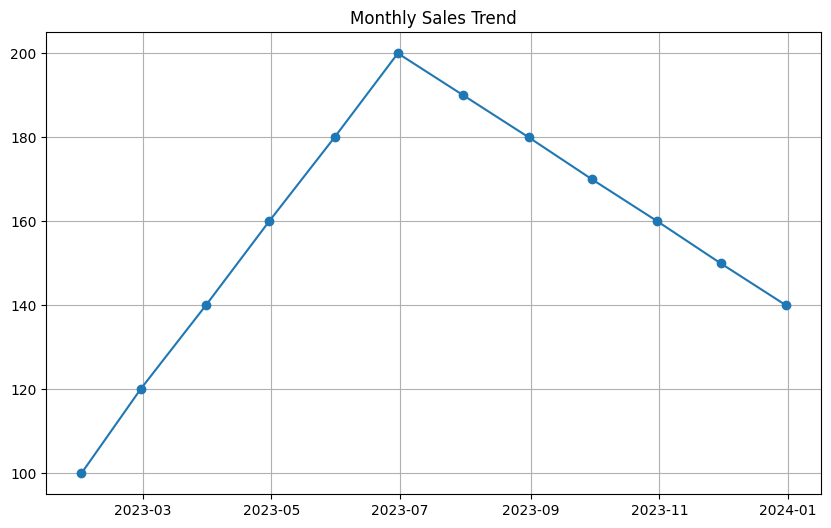

In [22]:
def create_sales_plot(df):
    plt.figure(figsize=(10, 6))
    plt.plot(df['date'], df['sales'], marker='o')
    plt.title('Monthly Sales Trend')
    plt.grid(True)
    plt.show()

create_sales_plot(df)

In [23]:
response.chat_message.content

'The sales trend visualization shows a clear pattern over the year 2023:\n\n1. **Increase in Sales**: From January to July, there is a steady increase in sales, peaking in July at 200.\n\n2. **Decrease in Sales**: After July, sales begin to decline steadily, reaching the lowest point in December at 100.\n\n3. **Overall Trend**: The sales data follows a symmetric pattern, with a peak in the middle of the year and declines towards the end.\n\n4. **Statistics**:\n   - **Mean Sales**: 157.5\n   - **Standard Deviation**: 29.27, indicating some variability in sales figures.\n   - **Quartiles**: \n     - 25% of sales are below 140.\n     - 50% (median) of sales are 160.\n     - 75% of sales are below 180.\n\nThis pattern might suggest seasonal factors or specific events influencing sales. Further analysis could explore these factors or compare with previous years for deeper insights.'